## Analisis de los diamantes

#### Importando bibliotecas

In [2]:
import os
print(os.getcwd())
os.chdir("/Users/heinerleivagmail.com")

/Users/heinerleivagmail.com


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
data = pd.read_csv("diamonds.csv", delimiter = ",", decimal = ".")

#### Explorando dataset

In [5]:
data.shape

(53940, 11)

In [6]:
data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


#### Histograma 

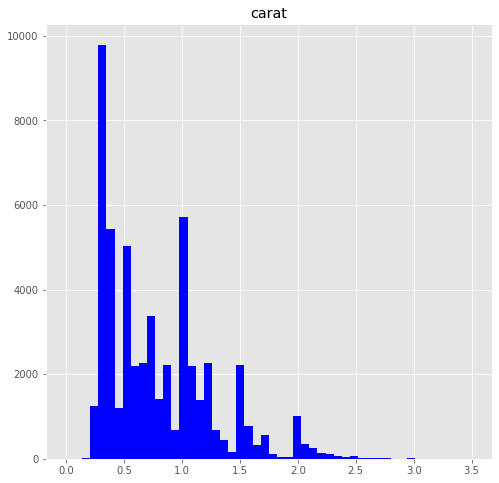

In [7]:
data.hist(column = "carat", figsize = (8,8), color = "blue", bins = 50,
          range = (0, 3.5)) # sin aplicar reglas
plt.show()

#### Cambiando histograma con estadisticas acorde a la problematica

#### Calculando el numero de clases segun la regla de Sturges

#### Paso 1: Definiendo parametros

In [8]:
x = data["carat"]
n = len(x) # Longitud de x
print(x.head())

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64


#### Paso 1: Implementado formula

In [9]:
import math
k2 = math.ceil(1+math.log(n,2)) # tomo la parte entera hacia arriba 
print(k2)

17


#### Paso 2: Decidir la amplitud de estos intervalos.

In [10]:
k3 = (x.max()-x.min())/k2
k3

0.2829411764705882

#### Paso 3: Calcular los extremos de los intervalos.

In [11]:
L1 = x.min()-1/2*0.09
print(L1)

0.15500000000000003


In [12]:
L = (L1 + k3) * np.arange(10)
print(L)

[0.         0.43794118 0.87588235 1.31382353 1.75176471 2.18970588
 2.62764706 3.06558824 3.50352941 3.94147059]


#### Paso 4: Calcular las marcas de la clase.

In [13]:
X1 = (L[0]+L[1])/2
X1

0.2189705882352941

In [14]:
X = X1 + k3 * np.arange(10)
X

array([0.21897059, 0.50191176, 0.78485294, 1.06779412, 1.35073529,
       1.63367647, 1.91661765, 2.19955882, 2.4825    , 2.76544118])

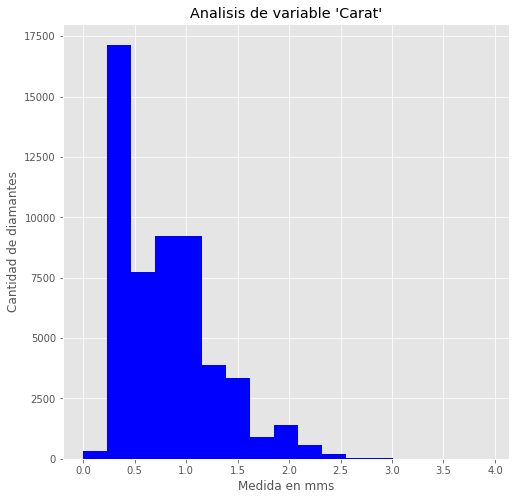

In [15]:
data.hist(column = "carat", figsize = (8,8), color = "blue", bins = 17,
          range = (0, 3.9414705)) # aplicando reglas
plt.title("Analisis de variable 'Carat'")
plt.xlabel("Medida en mms")
plt.ylabel("Cantidad de diamantes")
plt.show()

#### Filtros para ver si el Histograma es correcto:

In [16]:
ab = data['carat'] > 3.94
sum(ab) # es verdadero si hay unos datos que son mayores a 3.9 pero en el grafico no se observan

6

#### Filtro de outliers:

In [17]:
print(data[data["carat"]>3.5]) # Hay nueve diamantes con mas de 3.5 mms

       Unnamed: 0  carat        cut color clarity  depth  table  price      x  \
23644       23645   3.65       Fair     H      I1   67.1   53.0  11668   9.53   
25998       25999   4.01    Premium     I      I1   61.0   61.0  15223  10.14   
25999       26000   4.01    Premium     J      I1   62.5   62.0  15223  10.02   
26444       26445   4.00  Very Good     I      I1   63.3   58.0  15984  10.01   
26534       26535   3.67    Premium     I      I1   62.4   56.0  16193   9.86   
27130       27131   4.13       Fair     H      I1   64.8   61.0  17329  10.00   
27415       27416   5.01       Fair     J      I1   65.5   59.0  18018  10.74   
27630       27631   4.50       Fair     J      I1   65.8   58.0  18531  10.23   
27679       27680   3.51    Premium     J     VS2   62.5   59.0  18701   9.66   

           y     z  
23644   9.48  6.38  
25998  10.10  6.17  
25999   9.94  6.24  
26444   9.94  6.31  
26534   9.81  6.13  
27130   9.85  6.43  
27415  10.54  6.98  
27630  10.16  6.72  


#### Boxplot: 

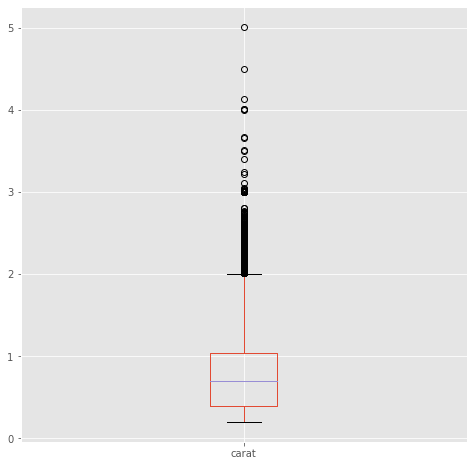

In [18]:
data.boxplot(column = "carat", figsize = (8,8))
plt.show() # las observaciones se distribuyen mas en la zona inferior, que la en la superior, y la mediana es menor a 
# 1 mm y el primer cuartil esta entre 0 y 0.30 aproximadamente. La mediana esta por arriba de 0.50 mms y el tercer cuartil
# es mayor levemente a 1 mm, el ultimo cuartil es de 2 mms, se observan outliers concentrados entre 2 y 3 mms, y unos pocos
# son mayores de 3 mms. 

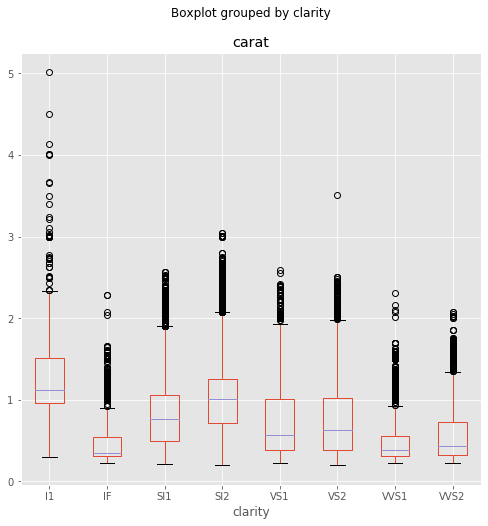

In [19]:
data.boxplot(column = "carat", by = "clarity", figsize = (8,8))
plt.show() # se crea un boxplot agrupados por claridad. Y los diamantes con menos claridad suelen ser mas grandes, 
# ver por ejemplo el I1.

#### Densidades: 

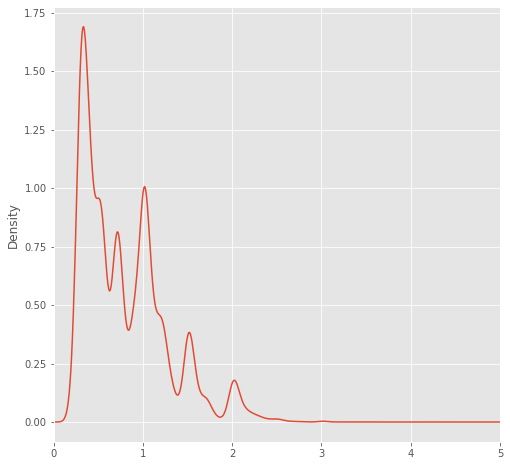

In [21]:
data["carat"].plot(kind = "density", figsize = (8,8), xlim = (0,5))
plt.show()

# Se ve que tiene un positive skew.

#### Tabla de frecuencias y Barplot: 

col_0    count
clarity       
I1         741
IF        1790
SI1      13065
SI2       9194
VS1       8171
VS2      12258
VVS1      3655
VVS2      5066


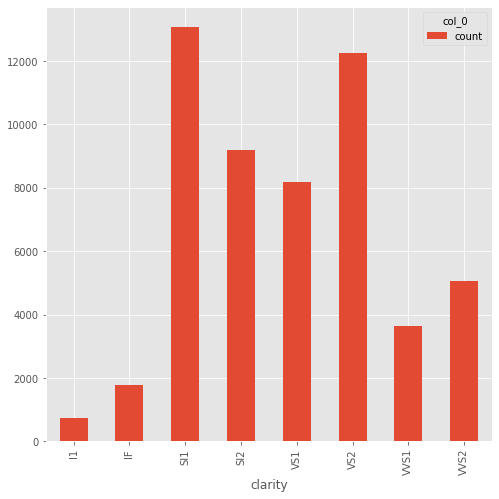

In [23]:
carat_table = pd.crosstab(index = data['clarity'], columns = "count")
print(carat_table)
carat_table.plot(kind = 'bar', figsize = (8,8))
plt.show()

color       D     E     F     G     H     I    J
clarity                                         
I1         42   102   143   150   162    92   50
IF         73   158   385   681   299   143   51
SI1      2083  2426  2131  1976  2275  1424  750
SI2      1370  1713  1609  1548  1563   912  479
VS1       705  1281  1364  2148  1169   962  542
VS2      1697  2470  2201  2347  1643  1169  731
VVS1      252   656   734   999   585   355   74
VVS2      553   991   975  1443   608   365  131


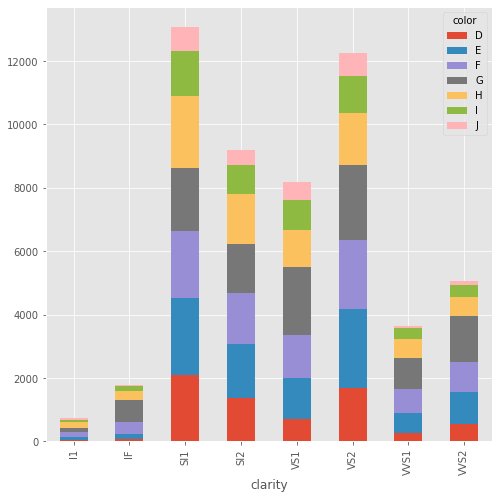

In [28]:
carat_table_2 = pd.crosstab(index = data["clarity"], columns = data["color"])
print(carat_table_2) # se pueden ver distribuciones por color y por claridad de diamante. 
carat_table_2.plot(kind = 'bar', figsize = (8,8), stacked = True)
plt.show()

color       D     E     F     G     H     I    J
clarity                                         
I1         42   102   143   150   162    92   50
IF         73   158   385   681   299   143   51
SI1      2083  2426  2131  1976  2275  1424  750
SI2      1370  1713  1609  1548  1563   912  479
VS1       705  1281  1364  2148  1169   962  542
VS2      1697  2470  2201  2347  1643  1169  731
VVS1      252   656   734   999   585   355   74
VVS2      553   991   975  1443   608   365  131


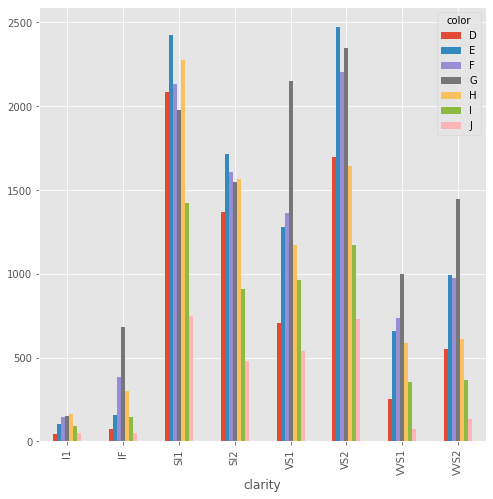

In [29]:
carat_table_2 = pd.crosstab(index = data["clarity"], columns = data["color"])
print(carat_table_2) # se pueden ver distribuciones por color y por claridad de diamante. 
carat_table_2.plot(kind = 'bar', figsize = (8,8), stacked = False)
plt.show()

#### Scatterplot:

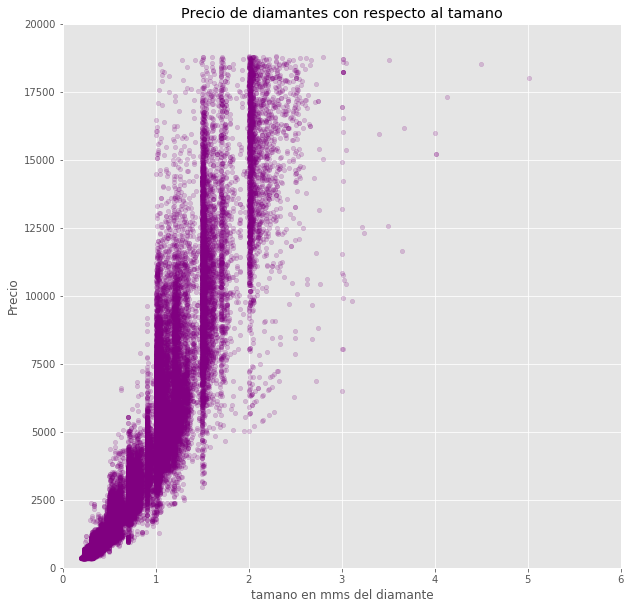

In [35]:
data.plot(kind = "scatter", x = "carat", y = "price", figsize = (10,10), ylim = (0,20000), 
          xlim = (0,6), color = "purple", alpha = 0.2)
plt.title("Precio de diamantes con respecto al tamano")
plt.ylabel("Precio")
plt.xlabel("tamano en mms del diamante")
plt.show()

# Como se puede ver en el grafico hay outliers aislados porque son muy tenues. Hay mucha concentracion de diamentes entre 
# 0 y 1.5 de tamano valen entre 0 y $12500, pero entre mas grande el tamano mas caro es el diamante. 